# Data Preprocessing Project 
### Team: Survivors

In [1]:
# Warming Up
import pandas as pd
import numpy as np

fPath = './data/vgsales.csv'
df = pd.read_csv(fPath)

# trying to create 1.5% worth of duplicates
rws = df.shape[0]
col = df.shape[1]

print('Number of instances = %d' % (rws))
print('Number of attributes = %d' % (col))
print(df.head())
# Tables that Michael Berbach will use
dfMB = df

Number of instances = 16598
Number of attributes = 11
   Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37  


# Missing Values

Author: Micheal Berbach | The purpose of this is to find any missing values 

In [2]:
data = df.replace('?',np.NaN)

print('Number of instances = %d' % (rws))
print('Number of attributes = %d' % (col))

print('Number of missing values:')
for col in df.columns:
    print('\t%s: %d' % (col,df[col].isna().sum()))

Number of instances = 16598
Number of attributes = 11
Number of missing values:
	Rank: 0
	Name: 0
	Platform: 0
	Year: 271
	Genre: 0
	Publisher: 58
	NA_Sales: 0
	EU_Sales: 0
	JP_Sales: 0
	Other_Sales: 0
	Global_Sales: 0


In [3]:
print('Number of rows in original data = %d' % (rws))
df = df.dropna()
print('Number of rows after discarding missing values = %d' % (df.shape[0]))
print('Difference in number of rows = %d' % (rws-df.shape[0]))
# update rws
rws = df.shape[0]

Number of rows in original data = 16598
Number of rows after discarding missing values = 16291
Difference in number of rows = 307


# Outliers
Author: Rahul Gupta | One way of preprocessing the data set is to prepare it for predicting a video game's sales based on its genre. It could be useful for publishers to know what genre of game to develop based on a prediction with this data. To do so, we will need to prepare the data set for normalization and remove outliers.

### One Hot Encoding
Start by using one-hot encoding to convert the genre categorical attribute into numerical values. One-hot encoding is crucial if we are including genre and normalizing the data set since categorical attributes without one-hot encoding are not compatible with normalization.

In [4]:
normalized = df
one_hot = pd.get_dummies(normalized['Genre'])

one_hot[20:23]

,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
20,False,False,False,False,False,False,False,True,False,False,False,False
21,False,False,False,False,True,False,False,False,False,False,False,False
22,False,False,False,False,True,False,False,False,False,False,False,False


### Dropping Columns
We also need to drop columns that do not fit the specific needs of the neural network. In this case, anything that is not genre or sales data. However, we will also drop genre as well and later replace it with the one-hot encoded columns made in the previous step.

In [5]:
print('Number of columns before discarding columns = %d' % (normalized.shape[1]))

normalized = normalized.drop(['Rank', 'Name', 'Platform', 'Genre', 'Year', 'Publisher'], axis=1)

print('Number of columns after discarding columns = %d' % (normalized.shape[1]))

Number of columns before discarding columns = 11
Number of columns after discarding columns = 5


### Concatenating Rows and Columns
After dropping the unnecessary columns, we now want to add the one-hot encoded genres to the main dataframe. To add the one-hot encoded rows and columns to the dataframe, we will use the pandas function concat, which will combine them both into one dataframe.

In [6]:
normalized = pd.concat([one_hot, normalized], axis=1)

normalized[20:23]

,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
20,False,False,False,False,False,False,False,True,False,False,False,False,6.42,4.52,6.04,1.37,18.36
21,False,False,False,False,True,False,False,False,False,False,False,False,10.83,2.71,4.18,0.42,18.14
22,False,False,False,False,True,False,False,False,False,False,False,False,9.54,3.44,3.84,0.46,17.28


### Normalization
Now, we will normalize the data to find and remove any outliers. Doing so will make it easier for the neural network to find and identify patterns with genre and sales data. All data will be converted into z scores with the following formula: z score = (x - mean)/standard deviation.

In [7]:
normalized = (normalized-normalized.mean())/normalized.std()

normalized[20:23]

,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
20,-0.499294,-0.291259,-0.232571,-0.339754,-0.238235,-0.190407,-0.285138,3.175168,-0.29225,-0.234325,-0.40585,-0.207095,7.483114,8.584810,19.113686,6.952620,11.368968
21,-0.499294,-0.291259,-0.232571,-0.339754,4.197285,-0.190407,-0.285138,-0.314925,-0.29225,-0.234325,-0.40585,-0.207095,12.845259,5.030933,13.149844,1.954799,11.228603
22,-0.499294,-0.291259,-0.232571,-0.339754,4.197285,-0.190407,-0.285138,-0.314925,-0.29225,-0.234325,-0.40585,-0.207095,11.276740,6.464264,12.059680,2.165234,10.679905


### Removing Outliers
After getting z scores, it is now possible to find outliers and remove them. Since all columns have been converted into z scores, we need to see if values are greater than -3 or less than or equal to 3. Rows that fall into that range are not outliers and are included in removed_outliers. However, rows that fall outside of that range are outliers and are excluded from the dataframe removed_outliers.


In [8]:
print('Number of rows before discarding outliers = %d' % (normalized.shape[0]))

removed_outliers = normalized.loc[((normalized > -3).sum(axis=1)==17) & ((normalized <= 3).sum(axis=1)==17)]
print('Number of rows after discarding outliers values = %d' % (removed_outliers.shape[0]))

removed_outliers[20:23]

Number of rows before discarding outliers = 16291
Number of rows after discarding outliers values = 7060


,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
325,2.002705,-0.291259,-0.232571,-0.339754,-0.238235,-0.190407,-0.285138,-0.314925,-0.29225,-0.234325,-0.405850,-0.207095,1.889947,2.144635,1.254224,1.060453,2.060230
327,-0.499294,-0.291259,-0.232571,2.943125,-0.238235,-0.190407,-0.285138,-0.314925,-0.29225,-0.234325,-0.405850,-0.207095,2.084492,2.596232,-0.252768,1.428713,2.053849
339,-0.499294,-0.291259,-0.232571,-0.339754,-0.238235,-0.190407,-0.285138,-0.314925,-0.29225,-0.234325,2.463813,-0.207095,2.266878,2.026827,-0.220704,1.586539,1.996428


# Duplicate Data

Author: Micheal Berbach | The purpose of this is to find any duplicate datas 

In [9]:

# It was found that duplicates exist when the rank attribute is removed
dfMB = dfMB.drop(['Rank'], axis=1)
dups = dfMB.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
dfMB.loc[dfMB.duplicated(keep=False)]

Number of duplicate rows = 1


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
14997,Wii de Asobu: Metroid Prime,Wii,NaN,Shooter,Nintendo,0.0,0.0,0.02,0.0,0.02
14999,Wii de Asobu: Metroid Prime,Wii,NaN,Shooter,Nintendo,0.0,0.0,0.02,0.0,0.02


In [10]:
print('Number of rows before discarding duplicates = %d' % (rws))
dfMB = dfMB.drop_duplicates()
print('Number of rows after discarding duplicates = %d' % (dfMB.shape[0]))

Number of rows before discarding duplicates = 16291
Number of rows after discarding duplicates = 16597


# Shuffling Dataframes

Author: Micheal Berbach

In [11]:
dfMB = dfMB.reindex(np.random.permutation(dfMB.index))
dfMB.reset_index(inplace=True, drop=True)
dfMB
# Shuffling is aparent as it was
# originally ranked in order of global sales

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Football Manager 2014,PSV,2013.0,Sports,Sega,0.00,0.10,0.00,0.04,0.14
1,"SpongeBob SquarePants: Lights, Camera, Pants!",GBA,2005.0,Misc,THQ,0.37,0.14,0.00,0.01,0.51
2,Crimson Sea 2,PS2,2004.0,Action,Tecmo Koei,0.03,0.03,0.00,0.01,0.07
3,WWE 2K14,X360,2013.0,Sports,Take-Two Interactive,0.64,0.39,0.00,0.10,1.13
4,Shrek,XB,2001.0,Platform,TDK Mediactive,0.25,0.10,0.00,0.01,0.36
...,...,...,...,...,...,...,...,...,...,...
16592,Space Chimps,Wii,2008.0,Platform,Brash Entertainment,0.08,0.00,0.00,0.01,0.09
16593,Kong: The Animated Series,GBA,2002.0,Action,BAM! Entertainment,0.01,0.00,0.00,0.00,0.02
16594,The Witch and the Hundred Knight,PS4,2015.0,Role-Playing,Nippon Ichi Software,0.02,0.01,0.05,0.01,0.08
16595,Momotarou Dentetsu DS: Tokyo & Japan,DS,2007.0,Misc,Hudson Soft,0.00,0.00,0.34,0.00,0.34


# Sorting Dataframes

Author: Micheal Berbach

In [12]:
# sorting first by year, then by global sales
dfMB = dfMB.sort_values(by=['Year','Global_Sales'],ascending=[True, False])
# Also getting rid of any rows that dont have a year
# So we can see the full range
dfMB = dfMB.dropna(subset=['Year'])
dfMB

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
3949,Asteroids,2600,1980.0,Shooter,Atari,4.00,0.26,0.00,0.05,4.31
498,Missile Command,2600,1980.0,Shooter,Atari,2.56,0.17,0.00,0.03,2.76
15025,Kaboom!,2600,1980.0,Misc,Activision,1.07,0.07,0.00,0.01,1.15
14573,Defender,2600,1980.0,Misc,Atari,0.99,0.05,0.00,0.01,1.05
15695,Boxing,2600,1980.0,Fighting,Activision,0.72,0.04,0.00,0.01,0.77
...,...,...,...,...,...,...,...,...,...,...
16198,Kamigami no Asobi InFinite,PSV,2016.0,Adventure,Broccoli,0.00,0.00,0.01,0.00,0.01
6535,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017.0,Role-Playing,Sega,0.00,0.00,0.03,0.00,0.03
9490,Brothers Conflict: Precious Baby,PSV,2017.0,Action,Idea Factory,0.00,0.00,0.01,0.00,0.01
16173,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017.0,Role-Playing,Sega,0.00,0.00,0.01,0.00,0.01


We can see it spans about 40 years with the data we have left

In [13]:
print("The first game with the most sales is: {}".format(dfMB['Name'].iloc[0]))
print("The first car is: {}".format(dfMB['Name'].loc[0]))
# check readout from shuffling frames if confused by what above line produces

#loc gets rows (or columns) with particular labels from the index.
#iloc gets rows (or columns) at particular positions in the index (so it only takes integers).

The first game with the most sales is: Asteroids
The first car is: Football Manager 2014


# Saving a Dataframe

Author: Micheal Berbach

In [14]:
import os

# Relative path within the repository
writeFlnam = os.path.join("data", "vgsalesMB.csv")

# Ensure the 'data' directory exists
os.makedirs(os.path.dirname(writeFlnam), exist_ok=True)

# Save the DataFrame
dfMB.to_csv(writeFlnam, index=False)
print("DataFrame saved to: {}".format(writeFlnam))

DataFrame saved to: data\vgsalesMB.csv


# Shuffle the dataframe

Author: Warisara Lee | The purpose of this is to shuffle the dataframe

In [15]:
df = df.reindex(np.random.permutation(df.index))
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
7958,7960,Reel Fishing Paradise 3D,3DS,2011.0,Sports,Marvelous Interactive,0.12,0.00,0.06,0.01,0.19
8654,8656,Rio,PS3,2011.0,Misc,THQ,0.04,0.09,0.00,0.03,0.16
6612,6614,Imagine: Ballet Star,DS,2008.0,Simulation,Ubisoft,0.23,0.01,0.00,0.02,0.25
10508,10510,Beyond Good & Evil,XB,2003.0,Adventure,Ubisoft,0.08,0.02,0.00,0.00,0.10
5519,5521,Phineas and Ferb: Across the 2nd Dimension,PS3,2011.0,Action,Disney Interactive Studios,0.15,0.12,0.00,0.05,0.33
...,...,...,...,...,...,...,...,...,...,...,...
7698,7700,Shiren the Wanderer,Wii,2008.0,Role-Playing,Sega,0.08,0.00,0.11,0.01,0.20
8143,8145,Godzilla (2015),PS4,2014.0,Action,Namco Bandai Games,0.10,0.03,0.02,0.03,0.18
1967,1969,Skylanders: Trap Team,Wii,2014.0,Action,Activision,0.42,0.54,0.00,0.08,1.05
39,40,Super Smash Bros. Brawl,Wii,2008.0,Fighting,Nintendo,6.75,2.61,2.66,1.02,13.04


In [16]:
df.reset_index(inplace=True, drop=True)
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,7960,Reel Fishing Paradise 3D,3DS,2011.0,Sports,Marvelous Interactive,0.12,0.00,0.06,0.01,0.19
1,8656,Rio,PS3,2011.0,Misc,THQ,0.04,0.09,0.00,0.03,0.16
2,6614,Imagine: Ballet Star,DS,2008.0,Simulation,Ubisoft,0.23,0.01,0.00,0.02,0.25
3,10510,Beyond Good & Evil,XB,2003.0,Adventure,Ubisoft,0.08,0.02,0.00,0.00,0.10
4,5521,Phineas and Ferb: Across the 2nd Dimension,PS3,2011.0,Action,Disney Interactive Studios,0.15,0.12,0.00,0.05,0.33
...,...,...,...,...,...,...,...,...,...,...,...
16286,7700,Shiren the Wanderer,Wii,2008.0,Role-Playing,Sega,0.08,0.00,0.11,0.01,0.20
16287,8145,Godzilla (2015),PS4,2014.0,Action,Namco Bandai Games,0.10,0.03,0.02,0.03,0.18
16288,1969,Skylanders: Trap Team,Wii,2014.0,Action,Activision,0.42,0.54,0.00,0.08,1.05
16289,40,Super Smash Bros. Brawl,Wii,2008.0,Fighting,Nintendo,6.75,2.61,2.66,1.02,13.04


# Sort the Dataframe

Author: Warisara Lee

In [17]:
print("Before sorting")
print(df['Global_Sales'])
df = df.sort_values(by='Global_Sales',ascending=True)

print("\nAfter sorting")
print(df['Global_Sales']) 

Before sorting
0         0.19
1         0.16
2         0.25
3         0.10
4         0.33
         ...  
16286     0.20
16287     0.18
16288     1.05
16289    13.04
16290     0.05
Name: Global_Sales, Length: 16291, dtype: float64

After sorting
3851      0.01
2532      0.01
8169      0.01
3992      0.01
13308     0.01
         ...  
6299     31.37
2167     33.00
3341     35.82
13559    40.24
15820    82.74
Name: Global_Sales, Length: 16291, dtype: float64


In [18]:
print("df['Global_Sales'].iloc[0] is: {}".format(df['Global_Sales'].iloc[0]))

print("df['Global_Sales'].loc[0] is: {}".format(df['Global_Sales'].loc[0])) 

df['Global_Sales'].iloc[0] is: 0.01
df['Global_Sales'].loc[0] is: 0.19


In [19]:
#Sorting in Ascending Order
#Sorting by column 'NA_Sales'
df = df.sort_values(by=['NA_Sales'],ascending=True)
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
3851,16260,Makai Senki Disgaea 3 Append Disc: Raspberyl-h...,PS3,2009.0,Role-Playing,Nippon Ichi Software,0.00,0.00,0.01,0.00,0.01
1312,11651,Slayers Royal 2,SAT,1998.0,Role-Playing,Kadokawa Shoten,0.00,0.00,0.08,0.00,0.08
7663,11384,God Eater Resurrection,PS4,2015.0,Action,Namco Bandai Games,0.00,0.00,0.08,0.00,0.08
7490,11256,Princess Maker 2,SAT,1995.0,Simulation,Micro Cabin,0.00,0.00,0.08,0.00,0.08
956,11397,Ken to Mahou to Gakuen Mono. 2,PSP,2009.0,Role-Playing,Acquire,0.00,0.00,0.08,0.00,0.08
...,...,...,...,...,...,...,...,...,...,...,...
3341,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
12957,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
9998,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31
13559,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24


In [20]:
#Sorting in Descending Order
#Sorting by column "EU_Sales"
df = df.sort_values(by=['EU_Sales'], ascending=False)
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
15820,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
3341,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
2167,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
11407,11,Nintendogs,DS,2005.0,Simulation,Nintendo,9.07,11.00,1.93,2.75,24.76
10031,17,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40
...,...,...,...,...,...,...,...,...,...,...,...
3709,16339,Nakayoshi All-Stars: Mezase Gakuen Idol,DS,2008.0,Misc,Creative Core,0.00,0.00,0.01,0.00,0.01
63,15509,Meiji Toukyou Renka,PSP,2013.0,Adventure,Broccoli,0.00,0.00,0.02,0.00,0.02
13866,13980,Simple DS Series Vol. 15: The Kanshikikan 2 - ...,DS,2007.0,Adventure,D3Publisher,0.00,0.00,0.04,0.00,0.04
2587,9237,PaRappa The Rapper,PSP,2006.0,Misc,Sony Computer Entertainment,0.10,0.00,0.02,0.01,0.14


# Sampling

Author: Maddie Ananda Subramanian | Sampling the data that we have found

In [21]:
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [22]:
sample = data.sample(n=10)
sample

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
13696,13698,Banushi Life Game: Winner's Circle,DS,2007.0,Sports,Genki,0.00,0.00,0.04,0.00,0.04
5058,5060,Just Dance 2015,PS4,2014.0,Misc,Ubisoft,0.19,0.13,0.00,0.06,0.38
13163,13165,Active Life: Magical Carnival,Wii,2011.0,Misc,Namco Bandai Games,0.04,0.01,0.00,0.00,0.05
1774,1776,Ratchet & Clank: All 4 One,PS3,2011.0,Platform,Sony Computer Entertainment,0.75,0.22,0.05,0.12,1.15
12596,12598,I Am In The Movie,PSP,2012.0,Simulation,Namco Bandai Games,0.00,0.00,0.06,0.00,0.06
15181,15184,Muppets Party Cruise,GC,2003.0,Misc,TDK Mediactive,0.02,0.00,0.00,0.00,0.02
3045,3047,Phoenix Wright: Ace Attorney - Trials and Trib...,DS,2007.0,Adventure,Capcom,0.33,0.05,0.25,0.04,0.67
3491,3493,MLB 11: The Show,PS3,2011.0,Sports,Sony Computer Entertainment,0.54,0.00,0.00,0.04,0.58
16565,16568,Teslagrad,PSV,2015.0,Platform,Rain Games,0.00,0.01,0.00,0.00,0.01
12592,12594,Tenchi Muyou! Ryoukouki Gokuraku,SAT,1995.0,Adventure,Yumedia,0.00,0.00,0.06,0.00,0.06


In [23]:
sample = data.sample(frac=0.01, random_state=999)
sample

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
10725,10727,The Land Before Time: Great Valley Racing Adve...,PS,2001.0,Racing,TDK Mediactive,0.05,0.04,0.00,0.01,0.10
9053,9055,Mojo!,PS2,2003.0,Puzzle,Mindscape,0.07,0.05,0.00,0.02,0.14
10102,10104,Vacation Sports,Wii,2009.0,Sports,Ubisoft,0.10,0.01,0.00,0.01,0.11
11876,11878,Disney's Donald Duck Advance,GBA,2001.0,Platform,Ubisoft,0.05,0.02,0.00,0.00,0.07
14561,14564,Gekiatsu!! Pachi Game Tamashi Vol. 1: CR Evang...,PSP,2011.0,Misc,Unknown,0.00,0.00,0.03,0.00,0.03
...,...,...,...,...,...,...,...,...,...,...,...
6592,6594,Silent Hunter 5: Battle of the Atlantic,PC,2010.0,Simulation,Ubisoft,0.00,0.21,0.00,0.05,0.26
4539,4541,EverQuest Online Adventures,PS2,2003.0,Role-Playing,Sony Online Entertainment,0.21,0.16,0.00,0.05,0.43
9920,9922,SD Gundam G Generation-F.I.F,PS,2001.0,Strategy,Namco Bandai Games,0.00,0.00,0.11,0.01,0.12
14440,14443,Eyeshield 21: DevilBats DevilDays,GBA,2006.0,Role-Playing,Nintendo,0.00,0.00,0.03,0.00,0.03


In [24]:
sample = data.sample(frac=0.01, replace=True, random_state=999)
sample

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
12636,12638,Adventures of Lolo,NES,1989.0,Puzzle,HAL Laboratory,0.06,0.00,0.00,0.00,0.06
13157,13159,Nike+ Kinect Training,X360,2012.0,Sports,Microsoft Game Studios,0.02,0.02,0.00,0.00,0.05
5832,5834,Karaoke Revolution Glee: Volume 3,Wii,2011.0,Misc,Konami Digital Entertainment,0.24,0.04,0.00,0.02,0.30
8417,8419,WRC 2: FIA World Rally Championship,PS3,2011.0,Racing,Ubisoft,0.00,0.13,0.00,0.04,0.17
10715,10717,Lord of Apocalypse,PSP,2011.0,Role-Playing,Square Enix,0.00,0.00,0.10,0.00,0.10
...,...,...,...,...,...,...,...,...,...,...,...
5585,5587,Resident Evil: Revelations 2,PS3,2015.0,Action,Capcom,0.06,0.08,0.16,0.03,0.32
10519,10521,God Eater 2: Rage Burst,PS4,2015.0,Role-Playing,Namco Bandai Games,0.00,0.01,0.09,0.00,0.10
6322,6324,Fushigi no Dungeon: Fuurai no Shiren GB: Tsuki...,GB,1996.0,Role-Playing,ChunSoft,0.00,0.00,0.27,0.00,0.27
1982,1984,Forza Motorsport,XB,2005.0,Racing,Microsoft Game Studios,0.52,0.51,0.00,0.02,1.05


# Data before and after dropping any columns

Author: Maddie Ananda Subramanian | The purpose of this is to show how the data is before and dropping certain columns

In [25]:
print("Data before dropping any columns:")
print(df.head())

Data before dropping any columns:
       Rank                Name Platform    Year       Genre  \
15820     1          Wii Sports      Wii  2006.0      Sports   
3341      3      Mario Kart Wii      Wii  2008.0      Racing   
2167      4   Wii Sports Resort      Wii  2009.0      Sports   
11407    11          Nintendogs       DS  2005.0  Simulation   
10031    17  Grand Theft Auto V      PS3  2013.0      Action   

                  Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
15820              Nintendo     41.49     29.02      3.77         8.46   
3341               Nintendo     15.85     12.88      3.79         3.31   
2167               Nintendo     15.75     11.01      3.28         2.96   
11407              Nintendo      9.07     11.00      1.93         2.75   
10031  Take-Two Interactive      7.01      9.27      0.97         4.14   

       Global_Sales  
15820         82.74  
3341          35.82  
2167          33.00  
11407         24.76  
10031         21.40  


In [26]:
if 'Rank' in df.columns:
    df.drop('Rank', axis=1, inplace=True)
else:
    print("'Rank' column not found in the DataFrame")

print("\nData after dropping the columns:")
print(df.head())


Data after dropping the columns:
                     Name Platform    Year       Genre             Publisher  \
15820          Wii Sports      Wii  2006.0      Sports              Nintendo   
3341       Mario Kart Wii      Wii  2008.0      Racing              Nintendo   
2167    Wii Sports Resort      Wii  2009.0      Sports              Nintendo   
11407          Nintendogs       DS  2005.0  Simulation              Nintendo   
10031  Grand Theft Auto V      PS3  2013.0      Action  Take-Two Interactive   

       NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
15820     41.49     29.02      3.77         8.46         82.74  
3341      15.85     12.88      3.79         3.31         35.82  
2167      15.75     11.01      3.28         2.96         33.00  
11407      9.07     11.00      1.93         2.75         24.76  
10031      7.01      9.27      0.97         4.14         21.40  


# Discretization

Author: Robby Dosanjh | The purpose of this is to discrete quantity and/or quantities and transform a continuousvalued attribute to a categorical attribute

### Step 1: Plotting the Histogram and Value Counts for Global Sales

NameError: name 'plt' is not defined

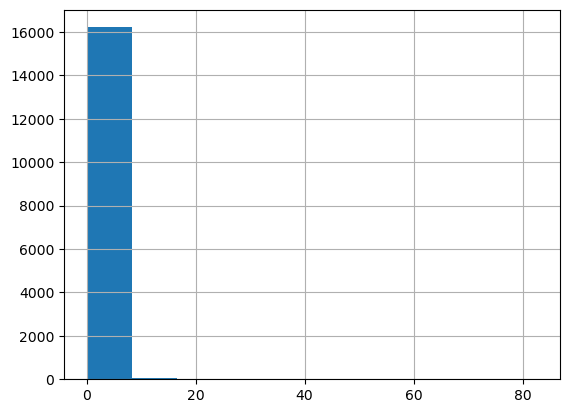

In [27]:
# Plot a histogram for the Global Sales
df['Global_Sales'].hist(bins=10)
plt.show()

# Count the frequency of each Global Sales value
print(df['Global_Sales'].value_counts(sort=False))

In [ ]:
"""
Step 2: 
Equal Width Discretization into 4 bins
This method divides the range of Global Sales into 4 bins of equal interval widths, categorizing the continuous sales data into discrete intervals.
"""

# Equal Width Discretization into 4 bins
bins_equal_width = pd.cut(df['Global_Sales'], 4)
print(bins_equal_width.value_counts(sort=False))

In [ ]:
"""
Step 3:
Equal Frequency Discretization into 4 bins
This method divides the Global Sales data into 4 bins such that each bin contains approximately the same number of records, ensuring an even distribution across bins
"""
# Equal Frequency Discretization into 4 bins
bins_equal_freq = pd.qcut(df['Global_Sales'], 4)
print(bins_equal_freq.value_counts(sort=False))

# Aggregation

Author: Isaiah Samaniego | The purpose is to aggregate NA, EU, JP, and Other sales into the single object Global_Sales

In [28]:
x = df.drop('Global_Sales', axis=1)
#Aggregates NA,EU, JP, and Other sales into the single object Global_Sales
x['Global_Sales'] = x[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum(axis=1)
print(x)

                                                    Name Platform    Year  \
15820                                         Wii Sports      Wii  2006.0   
3341                                      Mario Kart Wii      Wii  2008.0   
2167                                   Wii Sports Resort      Wii  2009.0   
11407                                         Nintendogs       DS  2005.0   
10031                                 Grand Theft Auto V      PS3  2013.0   
...                                                  ...      ...     ...   
3709             Nakayoshi All-Stars: Mezase Gakuen Idol       DS  2008.0   
63                                   Meiji Toukyou Renka      PSP  2013.0   
13866  Simple DS Series Vol. 15: The Kanshikikan 2 - ...       DS  2007.0   
2587                                  PaRappa The Rapper      PSP  2006.0   
3851   Makai Senki Disgaea 3 Append Disc: Raspberyl-h...      PS3  2009.0   

              Genre                    Publisher  NA_Sales  EU_Sales  \
158